In [4]:
from wikipedia2vec import Wikipedia2Vec
import os
import time
import pandas as pd
import numpy as np
import pickle
import gensim

import nltk
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

In [5]:
os.chdir("D:\창근\공부\성균관대\_졸논\컴퓨터공학\논문 트렌드 분석 방법 연구")

In [6]:
print (os.getcwd())

D:\창근\공부\성균관대\_졸논\컴퓨터공학\논문 트렌드 분석 방법 연구


In [7]:
MODEL_FILE = './enwiki/enwiki_20180420_win10_100d.pkl'

## 다음은 예제 코드입니다. 정상적으로 작동하면 결과 뜰 것임.
### Pretrained data는 두 개로 나눠져 있다.
Word : 내용 전체 포함. 소문자로만 되어 있음.

Entity : 표제만 포함. 대문자 그대로임.

In [8]:
wiki2vec = Wikipedia2Vec.load(MODEL_FILE)

In [9]:
wiki2vec.get_word_vector('ram')

memmap([-0.28108066, -0.24580207, -0.3453028 , -0.26693204,  0.07604776,
         0.07950985, -0.4013071 ,  0.371027  , -0.10209063, -0.16547424,
         0.35546365, -0.03499337,  0.4810935 , -0.0247711 ,  0.6654675 ,
         0.6868748 , -0.17947458, -0.25071502, -0.38239673, -0.07289735,
         0.21246287, -0.3406438 , -0.13159232,  0.64228356,  0.20363979,
        -0.59234893,  0.5206554 ,  0.4793145 , -0.11698707, -0.35107395,
         0.59233916,  0.15098831,  0.21566284,  0.06741711,  0.17410706,
         0.61831564,  0.32435963, -0.02891044, -0.11541634,  0.20510677,
         0.35892186, -0.12593259, -0.65592724,  0.06770121,  0.25496083,
         0.29104623,  0.20235395, -0.18535103, -0.4432048 ,  0.29753804,
        -0.39952484, -0.32598898,  0.1489867 ,  0.50611806,  0.09769119,
         0.36249286,  0.66147834, -0.18253979, -0.07603329,  0.07806999,
         0.17558034,  0.48491225, -0.25928882, -0.47785017,  0.23999836,
        -0.48740143,  0.15503086,  0.28547668,  0.3

In [10]:
wiki2vec.most_similar(wiki2vec.get_word('machine'), 20)

[(<Word machine>, 0.99999994),
 (<Word machines>, 0.7877456),
 (<Word slostin>, 0.7861282),
 (<Word einheitsmaschinengewehr>, 0.7546687),
 (<Word l37a1>, 0.7406934),
 (<Word m1919a2>, 0.735822),
 (<Word m240c>, 0.73292),
 (<Word l11a1>, 0.7307443),
 (<Word ginaca>, 0.7287393),
 (<Word l8a1>, 0.7260536),
 (<Word mg50>, 0.72534555),
 (<Word palletizer>, 0.7219499),
 (<Word sgmt>, 0.7218502),
 (<Word m1918m1>, 0.71929586),
 (<Word 315in>, 0.7185614),
 (<Word kleinflammenwerfer>, 0.7184659),
 (<Word mag58>, 0.7175656),
 (<Word defuzing>, 0.7171198),
 (<Word l43a1>, 0.7162624),
 (<Word l37a2>, 0.71545154)]

In [11]:
wiki2vec.get_entity_vector('Scarlett Johansson')

memmap([-7.3934019e-01, -4.9219817e-01, -4.2258736e-01,  5.4204553e-01,
        -1.1456601e-01, -6.9885385e-01, -4.5129403e-02, -2.2550362e-01,
        -4.8396614e-01,  4.3261728e-01,  7.7380174e-01, -2.7866521e-01,
        -2.3515283e-01,  8.3402467e-01,  1.1610613e+00,  6.0611492e-01,
         3.3689237e-01, -6.9169790e-01,  2.5748409e-02, -1.8423977e-01,
        -4.7181186e-01, -6.2870152e-02, -2.7133191e-01,  6.3593417e-01,
         1.3977311e+00,  5.1813495e-01,  4.8215788e-02, -1.2084860e+00,
         1.7581634e-01,  2.2923271e-01,  1.4231011e-01,  1.9371472e-01,
         4.2364649e-02, -5.5062354e-01,  4.3934953e-01,  7.7591199e-01,
         5.8910728e-01, -1.0891356e-01,  3.5113403e-01,  4.5360583e-01,
         1.2908849e+00,  1.9025780e+00, -3.7083137e-01,  2.9599072e-02,
        -2.7487081e-01,  4.3255150e-01,  1.6109006e-01, -1.8625103e-01,
         2.7524075e-01, -8.8827187e-01, -1.5277929e+00, -3.0613847e-03,
         4.0349716e-01, -2.7297637e-01,  1.4601653e+00,  7.64744

## 키워드와 wiki 매칭해보기

In [13]:
fname = './file/all_articles_df.p'

In [14]:
all_articles_df = pd.read_pickle(fname)
all_articles_df.head()

,idPrefix,id,pubDate,keywords,title,abstract
0,bd,13rRUwwslvh,2015-01-01,[],Welcome to the IEEE Transactions on Big Data,Presents an editorial introducting the inaugur...
1,bd,13rRUygT7c8,2015-01-01,[],Introduction to the IEEE Transactions on Big Data,Presents an introduction to the inaugural issu...
2,bd,13rRUwvT9j1,2015-01-01,"[Data Integration, Big Data, Data Mining, Feat...",Methodologies for Cross-Domain Data Fusion: An...,Traditional data mining usually deals with dat...
3,bd,13rRUxBJhxj,2015-01-01,"[Semantics, Internet, Electronic Publishing, S...",Embracing Information Explosion without Chokin...,The explosive popularity of microblogging serv...
0,bd,13rRUxAStUe,2015-07-01,"[Data Models, Computational Modeling, Big Data...",Petuum: A New Platform for Distributed Machine...,What is a systematic way to efficiently apply ...


In [15]:
all_articles_df['pubDate'] = pd.to_datetime(all_articles_df['pubDate'], format='%Y-%m-%d', errors='coerce')
all_articles_df = all_articles_df[~ all_articles_df['pubDate'].isnull()]
all_articles_from1990 = all_articles_df[all_articles_df.pubDate >= pd.to_datetime("1990-01-01")]

In [16]:
quarterly_keywords = all_articles_from1990[['pubDate', 'keywords']].groupby(pd.Grouper(key='pubDate', freq="Q")).agg(sum) # quarterly. http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases 
quarterly_keywords = quarterly_keywords[quarterly_keywords['keywords'] != False]
quarterly_keywords = quarterly_keywords[quarterly_keywords.keywords.str.len() != 0]


In [17]:
def remove_none_in_list(li):
    li = [x for x in li if x != '']
    return li

In [18]:
quarterly_keywords.keywords = quarterly_keywords.keywords.apply(remove_none_in_list)

In [19]:
quarterly_keywords.head()

,keywords
pubDate,
1995-03-31,"[Error Detection Codes, Error Correction Codes..."
1995-09-30,"[Radiosity, Hierarchical Techniques, Clusterin..."
1996-06-30,"[Programming Environments, Parallel Programmin..."
1996-09-30,"[Transport Protocols, Minimum Latency Transpor..."
1996-12-31,[Sequential Circuits]


In [20]:
def keywords_frequency(li):
    # 일단 시기별로(분기별로) 각 키워드가 나온 횟수를 딕셔너리로 만듦. 
    # input: 키워드가 들어있는 리스트 output: 각 키워드별 등장 횟수가 대응되는 딕셔너리. 
    freq = {}
    
    for i in li:
        if i in freq.keys():
            freq[i] += 1
        else:
            freq[i] = 1  
    
    for k, v in freq.items():
      if v > 10 :
        pass
      else:
        freq[k] = -1
        
    freq2 = {}

    for k, v in freq.items():
      if v != -1:
        freq2[k] = v
    
    return freq2

In [21]:
# 각 시기별로 키워드가 든 리스트가 주어지면 상대빈도 (그 시기에서 그 키워드가 차지하는 비중) 나타내려고 만들었던 것. 
# 개별 키워드가 아닌 클러스터로 뭉치기로 하면서, 클러스터 만들고 난 뒤 비중 합할 때 사용됨. 

def relative_frequency(li):
    freq = {}
    
    for i in li:
        if i in freq.keys():
            freq[i] += 1
        else:
            freq[i] = 1
    
    for k, v in freq.items():
      freq[k] = v / len(li)
    
    return freq

In [22]:
quarterly_keywords['relative_frequency'] = quarterly_keywords.keywords.apply(relative_frequency)

In [23]:
quarterly_keywords.head(20)

,keywords,relative_frequency
pubDate,,
1995-03-31,"[Error Detection Codes, Error Correction Codes...","{'Error Detection Codes': 0.05555555555555555,..."
1995-09-30,"[Radiosity, Hierarchical Techniques, Clusterin...","{'Radiosity': 0.1111111111111111, 'Hierarchica..."
1996-06-30,"[Programming Environments, Parallel Programmin...",{'Programming Environments': 0.033333333333333...
1996-09-30,"[Transport Protocols, Minimum Latency Transpor...","{'Transport Protocols': 0.08, 'Minimum Latency..."
1996-12-31,[Sequential Circuits],{'Sequential Circuits': 1.0}
1997-03-31,"[IEEE, Very Large Scale Integration, Wafer Sca...","{'IEEE': 0.038461538461538464, 'Very Large Sca..."
1997-09-30,"[Routing, Error Correction, Laboratories]","{'Routing': 0.3333333333333333, 'Error Correct..."
1997-12-31,"[Low Power Electronics, Paper Technology, Circ...","{'Low Power Electronics': 0.1, 'Paper Technolo..."
1998-03-31,"[IEEE, Very Large Scale Integration, Gallium A...","{'IEEE': 0.09090909090909091, 'Very Large Scal..."


In [24]:
all_keywords = quarterly_keywords.keywords.sum() # 전 기간 키워드를 다 모은 리스트

print(len(all_keywords))

all_keywords_frequency = keywords_frequency(all_keywords) # 그 리스트에서 각 키워드별 횟수를 세며 10번 미만인 것은 버린다. 

print(len(all_keywords_frequency.keys())) # 10번 이상 나왔던 키워드의 갯수 

all_keywords_unique = list(all_keywords_frequency.keys()) # 10번 이상 나온 키워드만 모은 리스트 

116870
1407


In [25]:
# all_keys = quarterly_keywords.keywords.sum()

# print(len(all_keys))
# len(set(all_keys))

In [26]:
unique_keys = all_keywords_unique

In [27]:
# 키워드가 Wikipedia에 있는지
def wiki_match(unique_keys):
  ext_keys = []
  exist = []
  
  for a in unique_keys:
    cases = [a, a.capitalize(), a.lower(), a.upper(), a.replace(' ',''), 
             a.replace(' ','').lower(), a.replace(' ','').capitalize(),
             a.replace(' ','-'), a.replace(' ','_'), 
             a.replace('ies', 'y'), a.replace('ies', 'y').lower(),
             a.replace('ies', 'y').upper(), a.replace('ies', 'y').capitalize(),
             a.capitalize()[:-1], a.lower()[:-1], a.upper()[:-1] ]
    a_split = a.split(' ')
    for i in range(0, len(a_split)) :
        cases.append( ''.join(a_split[:i+1]) + ' '.join(a_split[i+1:]) )
        cases.append( ' '.join(a_split[:i+1]) + ' '.join(a_split[i+1:]) )
        cases.append( ' '.join(a_split[:i+1]) + ''.join(a_split[i+1:]) )

    for i in cases:
      if wiki2vec.get_entity(i) != None :
        ext_keys.append(i)  # 같은 작업 두번해서 삭제함 (exist 변수)
        exist.append(a)
        break
      elif wiki2vec.get_word(i) != None:
        ext_keys.append(i)
        exist.append(a)
        break

  #중복되는 키 삭제      
  ext_keys = set(ext_keys)
  ext_keys = list(ext_keys)
  
  return ext_keys, exist

In [28]:
len(unique_keys)

1407

In [29]:
ext_keys, exist = wiki_match(unique_keys)

In [30]:
len(ext_keys)

1065

In [31]:
len(exist)

1070

In [32]:
diff_keys = set(unique_keys) - set(exist)

In [33]:
list(diff_keys)[:10]

['Computer Uses In Education',
 'Input Devices And Strategies',
 'Integrated Circuit Reliability',
 'Low Power',
 'And Serviceability',
 'CMOS Logic Circuits',
 'Security And Privacy Protection',
 'Load Modeling',
 'Approximation Methods',
 'Learning Systems']

In [34]:
#diff_keys  #너무 긴 것 지양합시다

## 우리꺼 키워드 벡터값 저장

In [35]:
wiki2vec #우리의 모델.
#우리는 100d의 10309 키워드에 대해서 클러스터링 할 것이다. (10309 = len(ext_keys)) ==> 바뀌었다. 10번 이상 등장했고 위키에 있는 1065개의 키워드에 대해 클러스터링한다. 

In [36]:
word_vectors = []
for k in ext_keys :
  if wiki2vec.get_entity(k) != None :
    temp = []
    target = wiki2vec.get_entity_vector(k)
    for i in range(len(target)) : #굳이 이렇게 할 필요 없음. 그냥 list()에 담으면 됨. 
      temp.append(target[i])
    word_vectors.append(temp)
    #word_vectors.append(wiki2vec.get_entity_vector(k))
  elif wiki2vec.get_word(k) != None :
    temp = []
    target = wiki2vec.get_word_vector(k)
    for i in range(len(target)) :
      temp.append(target[i])
    word_vectors.append(temp)
    #word_vectors.append(wiki2vec.get_word_vector(k))

In [37]:
# 위의 list로 해도 된다는거 확인. 

temp_wv = []
tar = wiki2vec.get_entity_vector(topic_query)
for i in range(len(tar)):
  temp_wv.append(tar[i])

print(temp_wv)
print(list(tar))

NameError: name 'topic_query' is not defined

In [38]:
len(word_vectors)

1065

In [39]:
word_vectors = np.array(word_vectors)

In [40]:
word_vectors

array([[-1.7338486 ,  0.03903867,  0.73775357, ..., -0.49418262,
        -0.5852587 ,  0.5298209 ],
       [-1.3269128 ,  0.4927579 ,  0.54500467, ..., -0.63545465,
         0.6979795 ,  0.8830216 ],
       [-0.7192567 ,  0.42019707,  0.0135353 , ...,  0.18642333,
         0.27074915,  0.10615928],
       ...,
       [-0.9467454 , -0.05934931, -0.1511179 , ...,  1.0222574 ,
        -0.2559586 , -0.3017242 ],
       [-1.5333058 , -0.7261838 , -0.4772204 , ..., -0.41621268,
        -0.11606929, -0.14885853],
       [-0.62898374,  0.5544821 ,  0.07285517, ..., -0.22011966,
        -0.14644705,  0.24650557]], dtype=float32)

In [41]:
print(wiki2vec.get_entity_vector('Multilayer perceptron').shape)
print(word_vectors[0].shape)
type(wiki2vec.get_entity_vector('Multilayer perceptron'))
type(word_vectors[0])

(100,)
(100,)


numpy.ndarray

# K-mean
클러스터링은 비지도 학습 기법

클러스터링은 유사성 등 개념에 기초해 몇몇 그룹으로 분류하는 기법
클러스터링의 목적은 샘플(실수로 구성된 n차원의 벡터)을 내부적으로는 비슷하지만 외부적으로 공통 분모가 없는 여러 그룹으로 묶는 것
특정 차원의 범위가 다른 차원과 차이가 크면 클러스터링 하기 전에 스케일을 조정해야 한다.

1.최초 센트로이드(centroid)(중심점)로 k개의 벡터를 무작위로 선정한다.
2.각 샘플을 그 위치에서 가장 가까운 센트로이드에 할당한다.
3.센트로이드의 위치를 재계산한다.
4.센트로이드가 더 이상 움직이지 않을 때까지 2와 3을 반복한다.

In [44]:
import pandas as pd
import numpy as np
#from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from bs4 import BeautifulSoup
import re
import time

from nltk.corpus import stopwords
import nltk.data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## K means 첫번째

In [45]:
# 단어 벡터에서 k-means를 실행하고 일부 클러스터를 찍어본다.
start = time.time() # 시작시간

# 클러스터의 크기 "k"를 어휘 크기의 1/40로 설정한다.
num_clusters = int(len(ext_keys)/40)
# K means 를 정의하고 학습시킨다.
kmeans = KMeans( n_clusters = num_clusters )
idx = kmeans.fit_predict( word_vectors )
#kmeans.fit(X_tsne)

end = time.time() # 끝난시간
elapsed = end - start # 걸린 시간
print("Time taken fortransforming : ", elapsed, "seconds.")

Time taken fortransforming :  0.4340250492095947 seconds.


In [46]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [47]:
len(centroids)

26

In [48]:
# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = ext_keys
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}
#     word_centroid_map = dict(zip( model.wv.index2word, idx ))

clusters = []
# 첫번째 클러스터의 처음 10개를 출력
for cluster in range(0,num_clusters):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)
    c_temp = {'id':cluster, 'topic':'None', 'keywords' : words}
    clusters.append(c_temp)


Cluster 0
['shadowing', 'sparks', 'stress', 'programming', 'jamming', 'protocols', 'mac', 'Proposals', 'media', 'substrates', 'fabrication', 'manuals', 'batteries', 'connectivity', 'reflection', 'filtering', 'spine', 'probes', 'tunneling', 'capacity', 'minimization', 'tracking', 'phantoms', 'wires', 'coverage', 'lattices', 'replication', 'survey', 'Java', 'smartgrids', 'hardware', 'localization', 'arrays', 'monitoring', 'fluctuations', 'timing', 'taxonomy', 'modeling', 'applications', 'degradation', 'dynamics', 'stability', 'networks', 'minimisation', 'svm', 'network', 'elasticity', 'kernel', 'trust', 'transforms', 'protocol', 'layout', 'registers', 'indexes', 'redundancy', 'indexing', 'compression', 'cache', 'production', 'visualization', 'standards', 'convergence', 'sensitivity', 'filters', 'Delays', 'rendering', 'texture', 'protection', 'aggregation', 'circuits', 'latches', 'partitioning', 'coherence', 'deployment', 'mood', 'Human Performance', 'appraisal', 'springs', 'resilience',

['Tree graph', 'Combinatorial Optimization', 'Mathematical Programming', 'Circuit complexity', 'Integer linear programming', 'Parallel algorithms', 'Simulated Annealing', 'Combinatorial mathematics', 'Logic Programming', 'Optimization problem', 'Sufficient condition', 'Optimization', 'Job Shop Scheduling', 'Algorithms', 'Game Theory', 'Dynamic Programming', 'Algorithm', 'Boolean functions', 'Constraint optimization', 'Distributed algorithm', 'Computational Complexity', 'Greedy algorithms', 'Linear Programming', 'Petri Nets', 'Nash Equilibrium', 'Complex Networks', 'Heuristic algorithm', 'Model checking', 'Optimisation', 'Galois fields', 'Graph Theory', 'Np complete', 'Sparse matrices', 'Bipartite Graph', 'Quadratic programming', 'Convex optimization', 'Integer Programming', 'Upper Bound', 'Approximation algorithm', 'Time complexity', 'Tree data structure', 'Computational Geometry', 'Distributed algorithms', 'Graph algorithms', 'Search problem', 'Constrained optimization', 'Game tree se

['Repeaters', 'Data communication', 'quantization', 'Convolutional codes', 'bandwidth', 'Crosstalk', 'Wavelet transforms', 'Automatic Repeat Request', 'Downlink', 'Reed solomon codes', 'Discrete cosine transform', 'Turbo codes', 'Error Detection', 'Wavelength Division Multiplexing', 'Channel estimation', 'Channel Capacity', 'Multiplexing', 'Forward Error Correction', 'Spread spectrum communication', 'Signal to noise ratio', 'Bit error rate', 'Noise reduction', 'Packet loss', 'OFDM', 'Synchronization', 'Communication channel', 'Synchronisation', 'Fading', 'Data Transfer', 'Propagation delay', 'Signal Processing', 'Network coding', 'Channel Coding', 'Discrete wavelet transform', 'Parity check code', 'Information Theory', 'MIMO', 'Error correction codes', 'Fading channel', 'Throughput', 'Data Compression', 'Blocking probability', 'Jitter', 'Video coding', 'Signal analysis', 'End to end delay', 'Digital Signal Processing', 'Error Correction']

Cluster 18
['Learning Management Systems', 'Me

In [57]:
# cluster 파일 내 pc에 저장하기
#from google.colab import files

column_name = ['id', 'topic', 'keywords']
df_clusters = pd.DataFrame(columns = column_name)
df_clusters = df_clusters.append(clusters)
df_clusters.to_csv('clusters.csv')
#files.download('clusters.csv')

In [58]:
df_clusters.head()

,id,topic,keywords
0,0,None,"[shadowing, sparks, stress, programming, jammi..."
1,1,None,"[Low power electronics, Voltage scaling, Switc..."
2,2,None,"[biomembranes, Laboratories, Tin, Fault diagno..."
3,3,None,"[Shading, Volume rendering, Path planning, Mes..."
4,4,None,"[Singular Value Decomposition, Control Theory,..."


In [59]:
# search할 정확한 키워드를 여기서 찾아봅니다. (대소문자까지 구분해서)

ext_keys

['Global Positioning System',
 'Grid Computing',
 'shadowing',
 'Protein protein interaction',
 'Field effect transistors',
 'sparks',
 'Risk Management',
 'Human Factors',
 'Shading',
 'Service level agreements',
 'Molecular configuration',
 'Low power electronics',
 'Wireless channels',
 'Virtual machine monitor',
 'Economics',
 'Collision Avoidance',
 'Information analysis',
 'Transmitters',
 'Acceleration',
 'Cognition',
 'Learning Management Systems',
 'Vibrations',
 'Sequential analysis',
 'Synthetic Biology',
 'Voltage scaling',
 'CUDA',
 'Pricing',
 'Singular Value Decomposition',
 'User study',
 'Data Center',
 'Machine Learning',
 'Repeaters',
 'stress',
 'Intrusion Detection',
 'Distributed Computing',
 'Metadata',
 'Pervasive Computing',
 'Anonymity',
 'programming',
 'Brain computer interface',
 'jamming',
 'Wireless ad hoc networks',
 'Fault tolerant systems',
 'Capacity planning',
 'Protein Structure',
 'Mobile ad hoc network',
 'Bioinformatics',
 'biomembranes',
 'Human

In [60]:
# find a cluster by a topic

topic_query = input("Search a topic: ")

Search a topic: Shading


In [61]:
def find_cluster_by_topic(topic):
  if topic not in ext_keys:
    print("No cluster has a topic -", topic)
    return
  
  for idx, q_key in enumerate(df_clusters.keywords):
    if topic in q_key:
      print("cluster id: ", idx)
      return q_key

In [62]:
# 해당 topic query가 속한 클러스터의 word 는 제외하고 keyword만 골라 word2vec numpy array 반환.  
# keyword로 있는 단어만 담은 새로운 list인 cluster_keywords_only 도 생성
cluster_w2v = []
cluster_keywords_only = []

if find_cluster_by_topic(topic_query) == None:
  print("No cluster has a topic", topic_query)

for i in find_cluster_by_topic(topic_query):
  try:
    cluster_w2v.append(list(wiki2vec.get_entity_vector(i))) 
    cluster_keywords_only.append(i)
  except:
    continue
cluster_w2v = np.array(cluster_w2v)
print(cluster_w2v)

cluster id:  3
cluster id:  3
[[-1.1270331  -0.17601445  0.59045595 ...  0.3362456   0.35509562
  -0.44962683]
 [-0.8637328   0.41145563  0.70091516 ... -0.4453067   0.22256295
   0.14176378]
 [-1.9115521  -0.5933299   0.09976611 ... -1.0372545  -0.64009774
   0.6022751 ]
 ...
 [-1.4361068   0.08320938  0.90906227 ... -0.56488454 -0.1076221
   0.997575  ]
 [-0.91813695  0.69786406  0.4162508  ... -0.84286606  0.42945036
   0.09361685]
 [-1.59804     0.83448076  1.1004966  ... -0.8633703   0.73662186
   0.34533343]]


In [63]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [64]:
tsne = TSNE(n_components=2)

start = time.time() # 시작시간
X_tsne = tsne.fit_transform(cluster_w2v)

end = time.time() # 끝난시간
elapsed = end - start # 걸린 시간
print("Time taken fortransforming : ", elapsed, "seconds.")

Time taken fortransforming :  0.24501419067382812 seconds.


In [65]:
df = pd.DataFrame(X_tsne, index=cluster_keywords_only, columns=['x', 'y'])
df.shape

(37, 2)

In [66]:
df.head(10)

,x,y
Shading,44.943798,-89.389015
Volume rendering,-12.900722,-66.636108
Path planning,-15.690826,42.186218
Mesh generation,1.489684,-42.190323
Solid modeling,-39.820442,94.141853
Graph drawing,-66.813248,31.628233
Data visualisation,47.224350,25.463087
Volume visualization,-3.745841,-18.233307
Flow visualization,-40.224777,-51.907478
IEEE Transactions,-29.504477,-27.156248


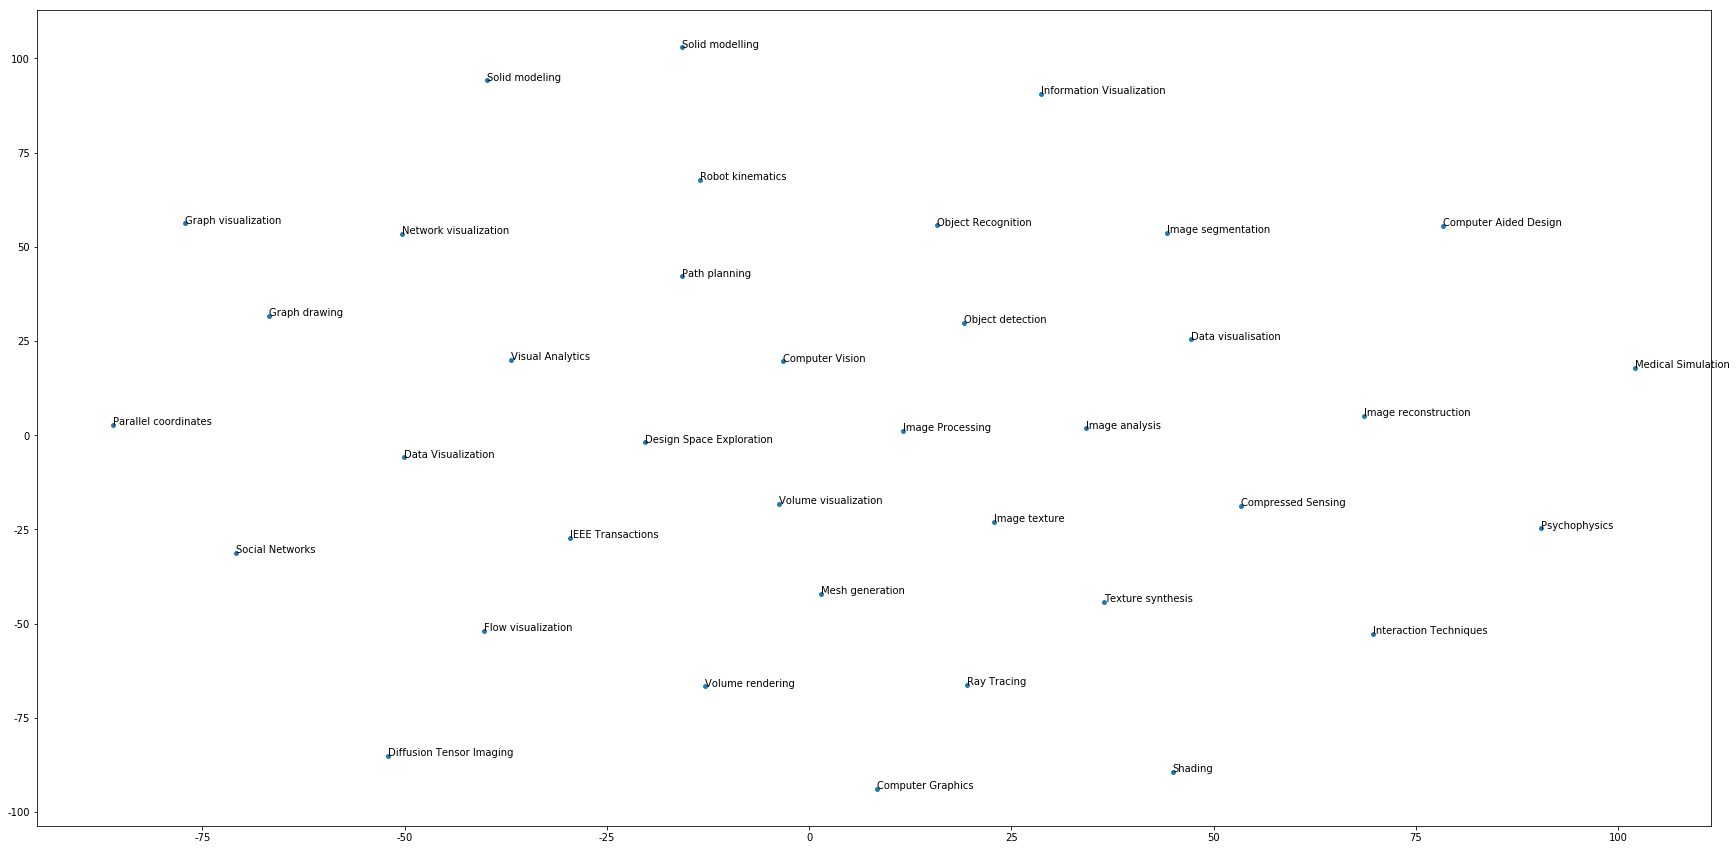

In [67]:
# 단어, 점 함께 출력

fig = plt.figure() # new figure 생성
fig.set_size_inches(30, 15) # 화면 크기
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], s = 15)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=10)
plt.show()

## 시계열 그리기 위해서 {클러스터 번호 : 토픽 빈도}로 바꾸기

In [68]:
word_centroid_map['Biological Neural Networks']

14

In [69]:
quarterly_keywords.tail()

,keywords,relative_frequency
pubDate,,
2017-12-31,"[Electroencephalography, Inverse Problems, Bra...",{'Electroencephalography': 0.00142045454545454...
2018-03-31,"[Feature Extraction, Image Reconstruction, Pro...","{'Feature Extraction': 0.007296311309282529, '..."
2018-06-30,"[Big Data, Optimization, Distributed Databases...","{'Big Data': 0.008113590263691683, 'Optimizati..."
2018-09-30,"[E Commerce, Product Recommendation, Similar F...","{'E Commerce': 0.0003736920777279522, 'Product..."
2018-12-31,"[Mathematical Model, Computational Modeling, P...","{'Mathematical Model': 0.00847457627118644, 'C..."


In [70]:
# 클러스터 번호 : 빈도(연도별) 매칭 함수
# relativeFrequency에는 단어 : 빈도
# word_centroid_map에는 단어:클러스터 번호

def cluster_frequency(freq, word_centroid_map):
    result = {}
    
    for k, v in freq.items():
      #print(k,v, end='/')
      if k in word_centroid_map.keys() and v != -1:
        cluster_num = word_centroid_map[k] 
        result[cluster_num] = v
      
    return result

In [71]:
# 클러스터 번호 : 빈도(연도별) 매칭 함수를 만든다. 
#
# df의 매 분기별 row에 들어가 있는 relativeFrequency에는 단어: 빈도
# 글로벌 변수 word_centroid_map에는 단어:클러스터 번호
#
#라는 것을 참고하자. 

def cluster_frequency(rel_freq_dic): 
  result = {}
  
  for k, v in rel_freq_dic.items(): # 어떤 한 분기의 키워드 딕셔너리 relative_freq를 돌면서
    try:
      cluster_num = word_centroid_map[k] # 키워드에 매칭되는 클러스터 번호를 구하고 
    except:
      continue

    if cluster_num in result.keys(): # 그 번호가 result에 이미 키 값으로 있으면 상대도수를 더해주고 
      result[cluster_num] += v
    else: # 없는 번호면 새로 키로 만들어준다. 
      result[cluster_num] = v
        
  return result

In [72]:
quarterly_keywords['clusterFrequency'] = quarterly_keywords.relative_frequency.apply(cluster_frequency)

In [73]:
quarterly_keywords.head(10)

,keywords,relative_frequency,clusterFrequency
pubDate,,,
1995-03-31,"[Error Detection Codes, Error Correction Codes...","{'Error Detection Codes': 0.05555555555555555,...","{17: 0.16666666666666666, 4: 0.166666666666666..."
1995-09-30,"[Radiosity, Hierarchical Techniques, Clusterin...","{'Radiosity': 0.1111111111111111, 'Hierarchica...",{}
1996-06-30,"[Programming Environments, Parallel Programmin...",{'Programming Environments': 0.033333333333333...,"{24: 0.06666666666666667, 5: 0.1, 7: 0.0666666..."
1996-09-30,"[Transport Protocols, Minimum Latency Transpor...","{'Transport Protocols': 0.08, 'Minimum Latency...","{18: 0.04, 1: 0.04, 3: 0.04, 7: 0.04, 17: 0.04}"
1996-12-31,[Sequential Circuits],{'Sequential Circuits': 1.0},{1: 1.0}
1997-03-31,"[IEEE, Very Large Scale Integration, Wafer Sca...","{'IEEE': 0.038461538461538464, 'Very Large Sca...","{7: 0.038461538461538464, 1: 0.076923076923076..."
1997-09-30,"[Routing, Error Correction, Laboratories]","{'Routing': 0.3333333333333333, 'Error Correct...","{7: 0.3333333333333333, 17: 0.3333333333333333..."
1997-12-31,"[Low Power Electronics, Paper Technology, Circ...","{'Low Power Electronics': 0.1, 'Paper Technolo...",{12: 0.30000000000000004}
1998-03-31,"[IEEE, Very Large Scale Integration, Gallium A...","{'IEEE': 0.09090909090909091, 'Very Large Scal...","{7: 0.09090909090909091, 1: 0.09090909090909091}"


In [74]:
quarterly_keywords.tail(10)

,keywords,relative_frequency,clusterFrequency
pubDate,,,
2016-09-30,"[Parking Violation, Spatial Temporal Interval,...","{'Parking Violation': 0.0005076142131979696, '...","{23: 0.01878172588832487, 6: 0.005076142131979..."
2016-12-31,"[Image Processing, Distributed Databases, Iter...","{'Image Processing': 0.0014619883040935672, 'D...","{3: 0.0043859649122807015, 23: 0.0211988304093..."
2017-03-31,"[Special Issues And Sections, Collaboration, K...",{'Special Issues And Sections': 0.001256807708...,"{21: 0.026811897779639705, 16: 0.0213657310431..."
2017-06-30,"[Urban Areas, Meteorology, Indexes, Roads, Pub...","{'Urban Areas': 0.003246753246753247, 'Meteoro...","{21: 0.03961038961038962, 20: 0.01298701298701..."
2017-09-30,"[Big Data, Throughput, Tuning, Predictive Mode...","{'Big Data': 0.00592255125284738, 'Throughput'...","{23: 0.028246013667425966, 17: 0.0031890660592..."
2017-12-31,"[Electroencephalography, Inverse Problems, Bra...",{'Electroencephalography': 0.00142045454545454...,"{14: 0.015625, 23: 0.03693181818181818, 12: 0...."
2018-03-31,"[Feature Extraction, Image Reconstruction, Pro...","{'Feature Extraction': 0.007296311309282529, '...","{16: 0.020267531414673697, 9: 0.00810701256586..."
2018-06-30,"[Big Data, Optimization, Distributed Databases...","{'Big Data': 0.008113590263691683, 'Optimizati...","{23: 0.0392156862745098, 8: 0.0175794455713319..."
2018-09-30,"[E Commerce, Product Recommendation, Similar F...","{'E Commerce': 0.0003736920777279522, 'Product...","{23: 0.02877428998505232, 13: 0.01831091180866..."


In [75]:
#quarterly_keywords.loc['2017-12-31'].relativeFrequency

## 시계열 그래프 그리기
간편하게 하는 법 몰라서 노가다로,,

In [76]:
def find_freq(li, clu_num):
  if clu_num in li.keys():
    return li[clu_num]
  else:
    return 0

In [77]:
#quarterly_keywords.index = quarterly_keywords.index.astype(np.int64)
quarterly_keywords.index = pd.to_datetime(quarterly_keywords.index)
plot_data = quarterly_keywords.apply(lambda x : find_freq(x['clusterFrequency'], 12), axis=1)

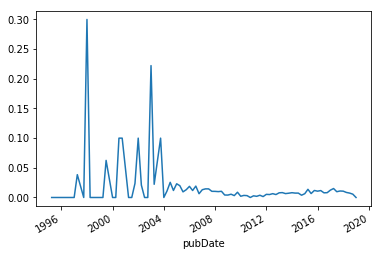

In [78]:
plot_data.plot.line()
plt.show()

In [79]:
plot_data

pubDate
1995-03-31    0.000000
1995-09-30    0.000000
1996-06-30    0.000000
1996-09-30    0.000000
1996-12-31    0.000000
1997-03-31    0.038462
1997-09-30    0.000000
1997-12-31    0.300000
1998-03-31    0.000000
1998-06-30    0.000000
1999-03-31    0.000000
1999-06-30    0.062500
1999-12-31    0.000000
2000-03-31    0.000000
2000-06-30    0.100000
2000-09-30    0.100000
2001-03-31    0.000000
2001-06-30    0.000000
2001-09-30    0.023810
2001-12-31    0.100000
2002-03-31    0.020833
2002-06-30    0.000000
2002-09-30    0.000000
2002-12-31    0.222222
2003-03-31    0.022222
2003-09-30    0.100000
2003-12-31    0.000000
2004-03-31    0.010962
2004-06-30    0.025550
2004-09-30    0.011826
                ...   
2011-09-30    0.001530
2011-12-31    0.005288
2012-03-31    0.004950
2012-06-30    0.006446
2012-09-30    0.004949
2012-12-31    0.007880
2013-03-31    0.008213
2013-06-30    0.006554
2013-09-30    0.007220
2013-12-31    0.008055
2014-03-31    0.007402
2014-06-30    0.007391
201

0


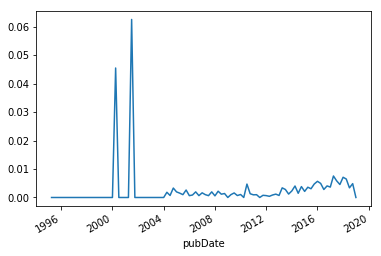

1


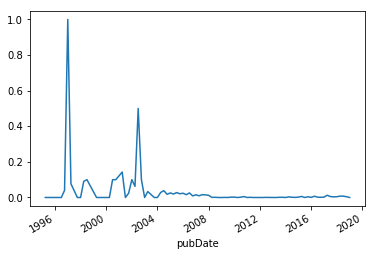

2


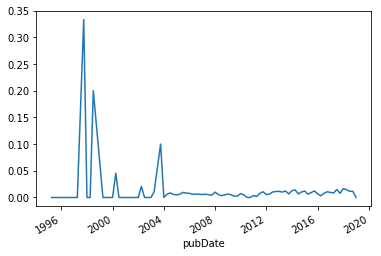

3


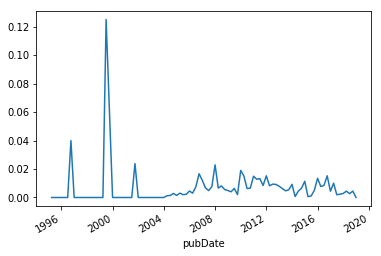

4


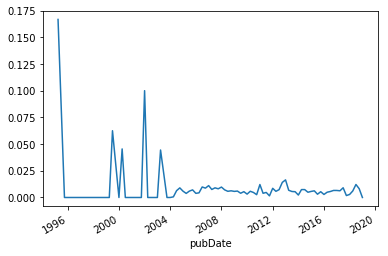

5


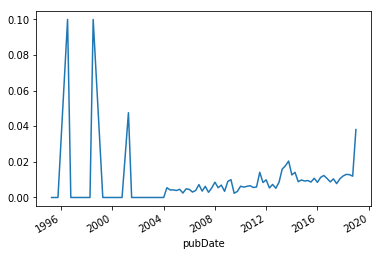

6


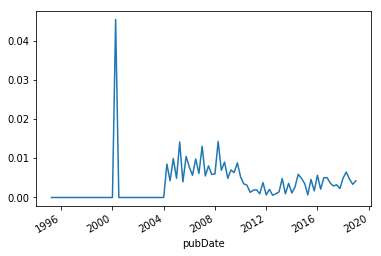

7


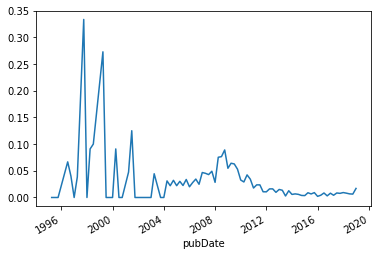

8


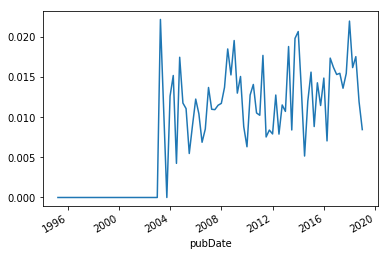

9


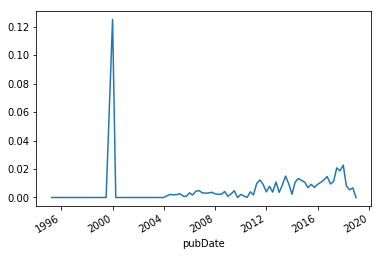

10


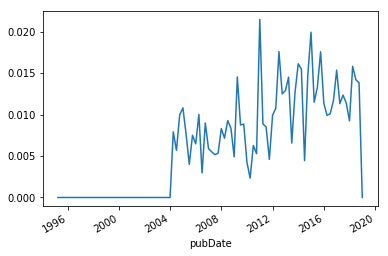

11


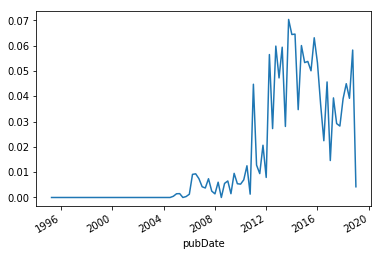

12


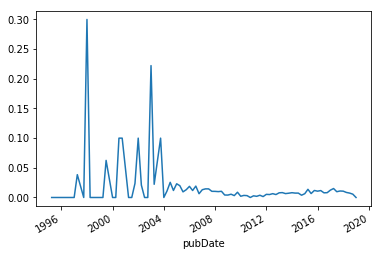

13


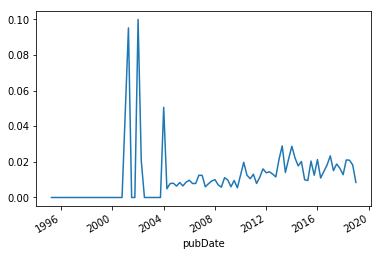

14


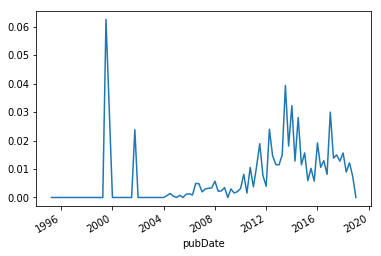

15


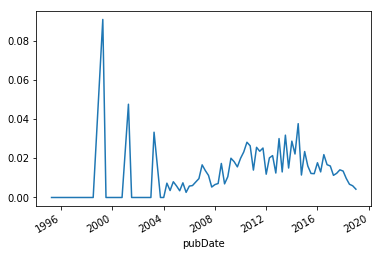

16


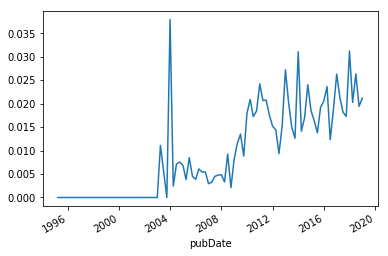

17


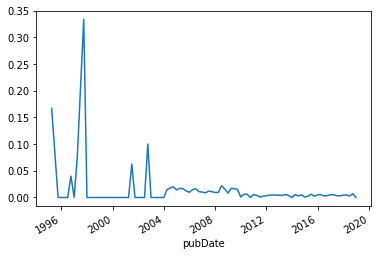

18


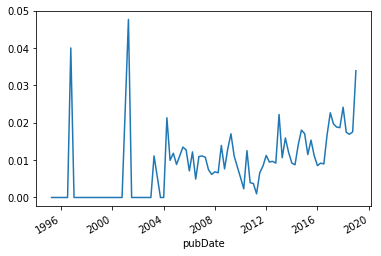

19


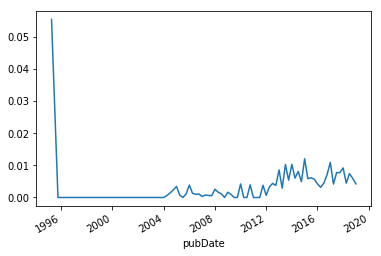

20


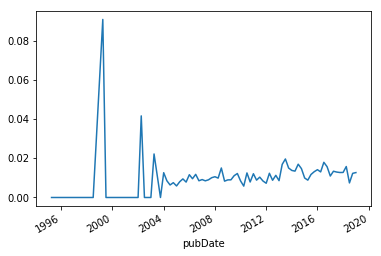

21


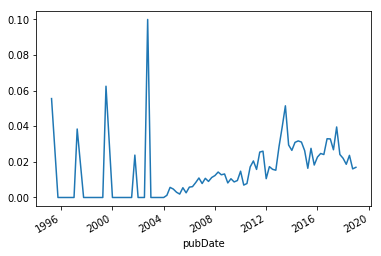

22


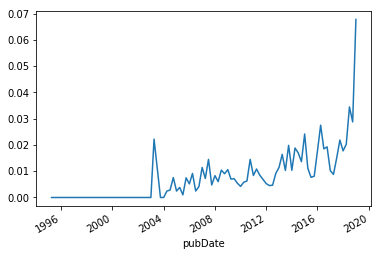

23


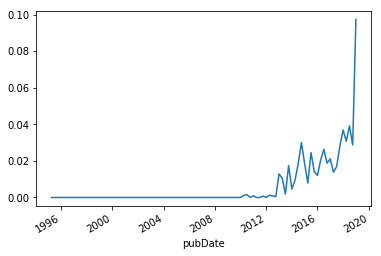

24


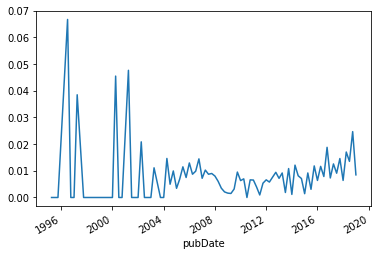

25


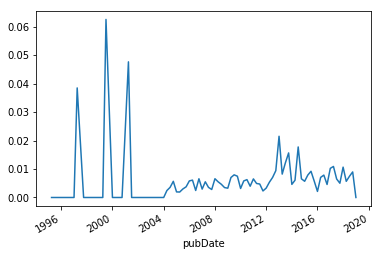

In [80]:
for clu_num in range(26):
  print(clu_num)
  plot_data = quarterly_keywords.apply(lambda x : find_freq(x['clusterFrequency'], clu_num), axis=1)
  plot_data.plot.line()
  plt.show()

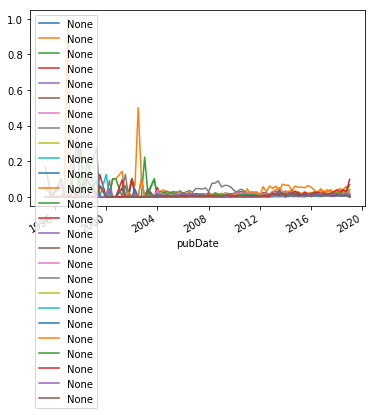

In [81]:
# 한방에 그리기
for clu_num in range(26):
  #print(clu_num)
  plot_data = quarterly_keywords.apply(lambda x : find_freq(x['clusterFrequency'], clu_num), axis=1)
  plot_data.plot.line()
plt.legend(loc='best')
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


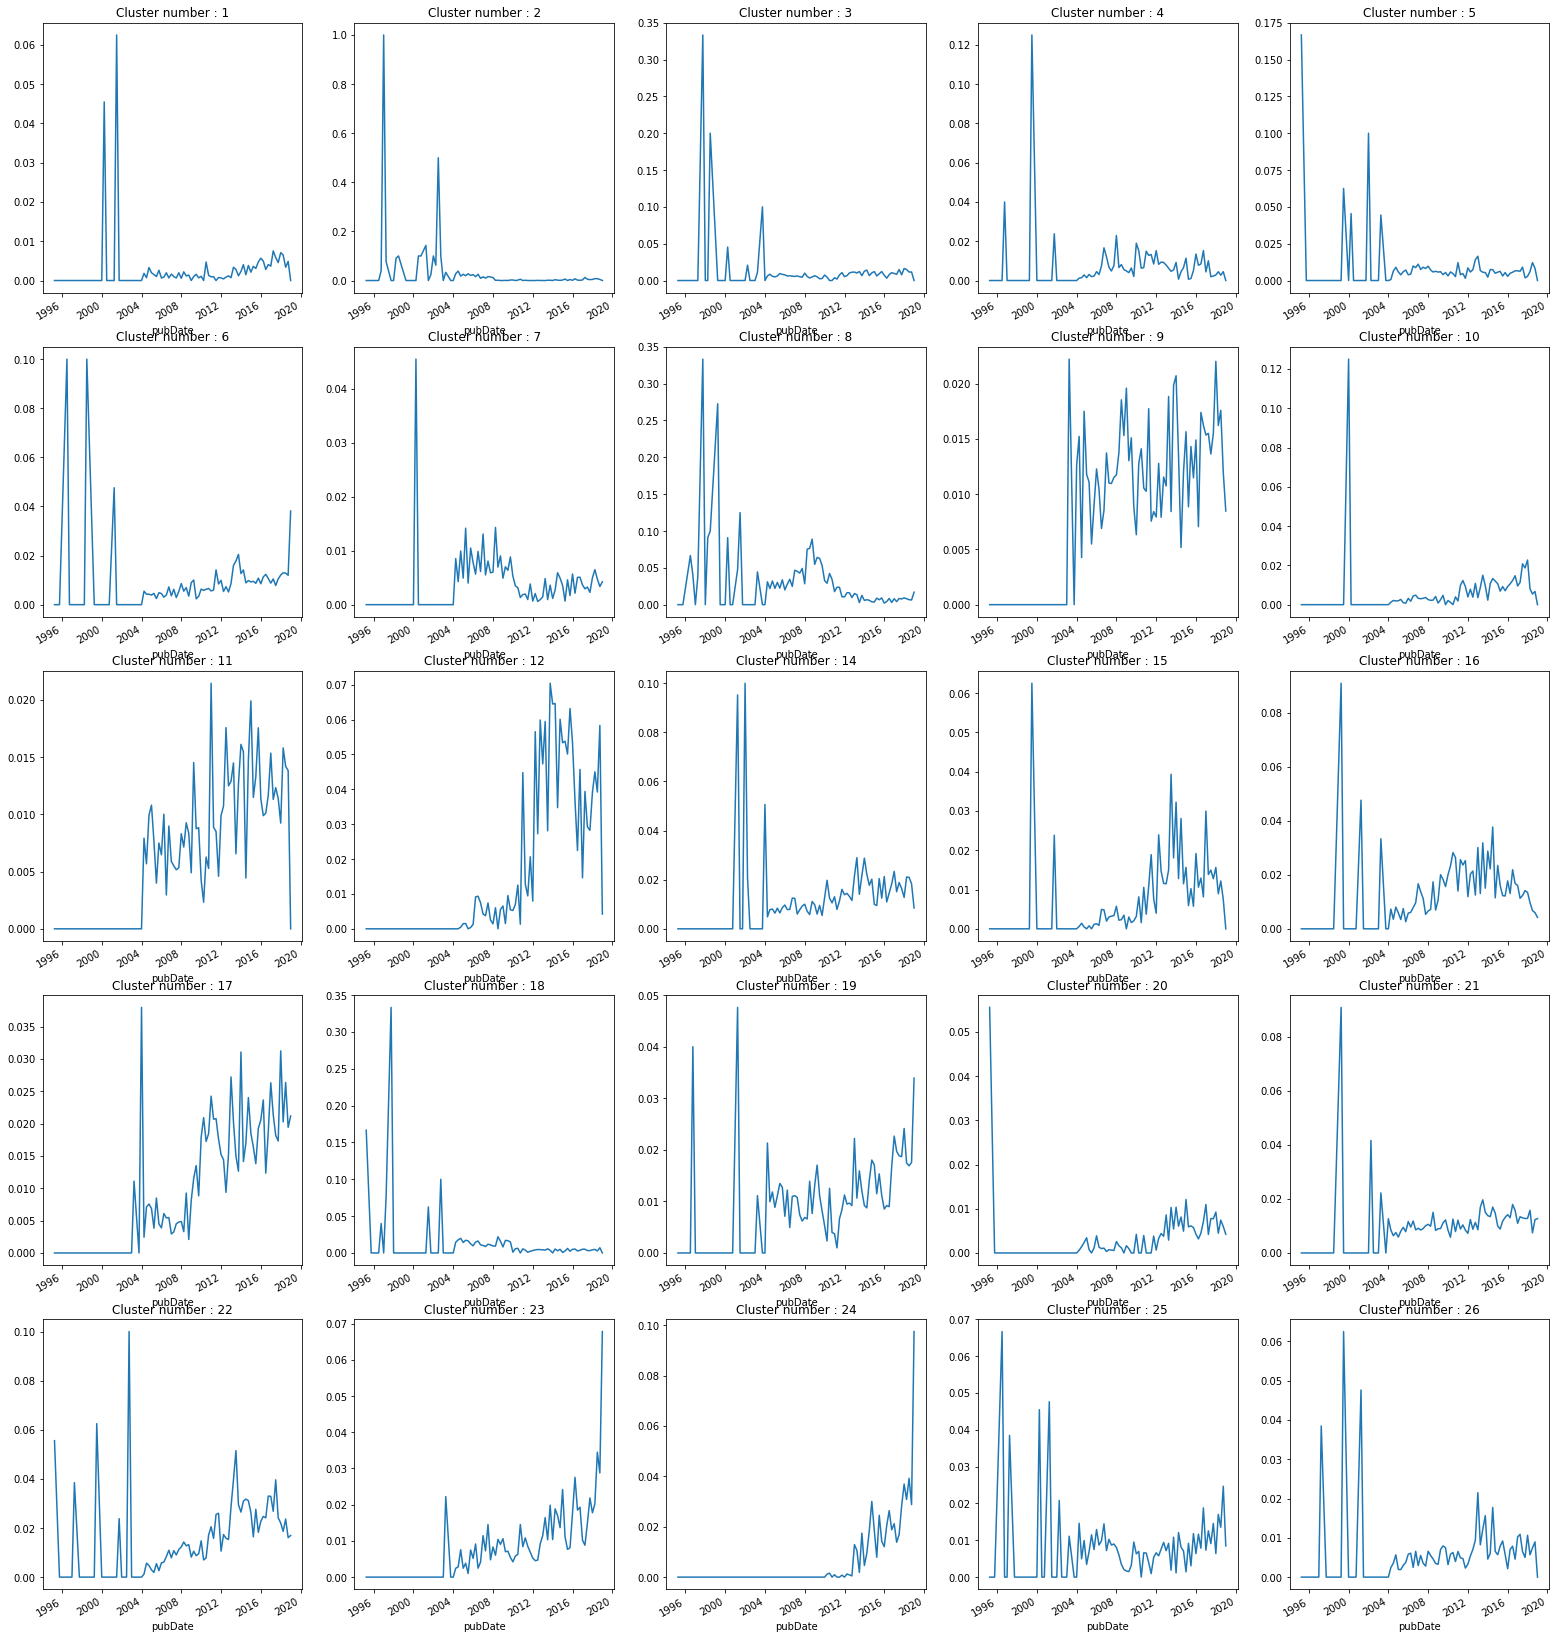

In [82]:
plt.figure(figsize=(27, 32))
for clu_num in range(26):
  print(clu_num)
  if clu_num == 12:
    continue
  if clu_num < 12:
    plt.subplot(5, 5, clu_num+1)
  else:
    plt.subplot(5, 5, clu_num)
  plot_data = quarterly_keywords.apply(lambda x : find_freq(x['clusterFrequency'], clu_num), axis=1)
  plot_data.plot.line()
  plt.title("Cluster number : "+ str(clu_num+1))
plt.show()

In [83]:
quarterly_keywords.tail()

,keywords,relative_frequency,clusterFrequency
pubDate,,,
2017-12-31,"[Electroencephalography, Inverse Problems, Bra...",{'Electroencephalography': 0.00142045454545454...,"{14: 0.015625, 23: 0.03693181818181818, 12: 0...."
2018-03-31,"[Feature Extraction, Image Reconstruction, Pro...","{'Feature Extraction': 0.007296311309282529, '...","{16: 0.020267531414673697, 9: 0.00810701256586..."
2018-06-30,"[Big Data, Optimization, Distributed Databases...","{'Big Data': 0.008113590263691683, 'Optimizati...","{23: 0.0392156862745098, 8: 0.0175794455713319..."
2018-09-30,"[E Commerce, Product Recommendation, Similar F...","{'E Commerce': 0.0003736920777279522, 'Product...","{23: 0.02877428998505232, 13: 0.01831091180866..."
2018-12-31,"[Mathematical Model, Computational Modeling, P...","{'Mathematical Model': 0.00847457627118644, 'C...","{5: 0.03813559322033898, 16: 0.021186440677966..."


In [84]:
# 시리즈 -> 데이터 프레임 만들어서 내보내기
df_plot_data = quarterly_keywords.apply(lambda x : find_freq(x['clusterFrequency'], 0), axis=1)

for clu_num in range(1,26):
  print(clu_num)
  plot_data = quarterly_keywords.apply(lambda x : find_freq(x['clusterFrequency'], clu_num), axis=1)
  df_plot_data = pd.concat([df_plot_data, plot_data], axis=1)
  #print(plot_data.head())
  #print(df_plot_data.head())

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [85]:
df_plot_data.head()

,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pubDate,,,,,,,,,,,,,,,,,,,,,
1995-03-31,0.0,0.00,0.0,0.00,0.166667,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.166667,0.00,0.055556,0.0,0.055556,0.0,0.0,0.000000,0.0
1995-09-30,0.0,0.00,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1996-06-30,0.0,0.00,0.0,0.00,0.000000,0.1,0.0,0.066667,0.0,0.0,...,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.066667,0.0
1996-09-30,0.0,0.04,0.0,0.04,0.000000,0.0,0.0,0.040000,0.0,0.0,...,0.0,0.040000,0.04,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1996-12-31,0.0,1.00,0.0,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [86]:
df_plot_data.columns = [i for i in range(26)]

In [88]:
# plot_data 파일 내 pc에 저장하기
#from google.colab import files

df_plot_data.to_pickle('clusters_plot.p')
#files.download('clusters_plot.p')

## Word2Vec으로 벡터화 한 단어를 t-SNE 를 통해 시각화

In [89]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [90]:
#model = g.Doc2Vec.load(word_vectors)

#vocab = list(model.wv.vocab)
X = word_vectors

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

start = time.time() # 시작시간

#X_tsne = tsne.fit_transform(X[:100,:]) # 100개의 단어에 대해서만 시각화를 원할 경우
X_tsne = tsne.fit_transform(X)

end = time.time() # 끝난시간
elapsed = end - start # 걸린 시간
print("Time taken fortransforming : ", elapsed, "seconds.")

1065
[-1.7338486   0.03903867  0.73775357 -0.32044876  0.38342968 -0.9840778
  0.64681864  0.17976409 -0.25348413 -0.01251188]
Time taken fortransforming :  11.252643585205078 seconds.


In [91]:
df = pd.DataFrame(X_tsne, index=ext_keys, columns=['x', 'y'])
df.shape

(1065, 2)

In [92]:
df.head(10)

,x,y
Global Positioning System,38.334953,-20.895334
Grid Computing,-5.887883,-38.678337
shadowing,-11.531027,19.359243
Protein protein interaction,-1.089725,42.114815
Field effect transistors,-26.264616,-19.078060
sparks,-12.292523,23.592775
Risk Management,14.331409,9.809571
Human Factors,23.032696,11.088443
Shading,-6.806538,1.988679
Service level agreements,19.372929,-22.193289


## 1)우리꺼 키워드 시각화

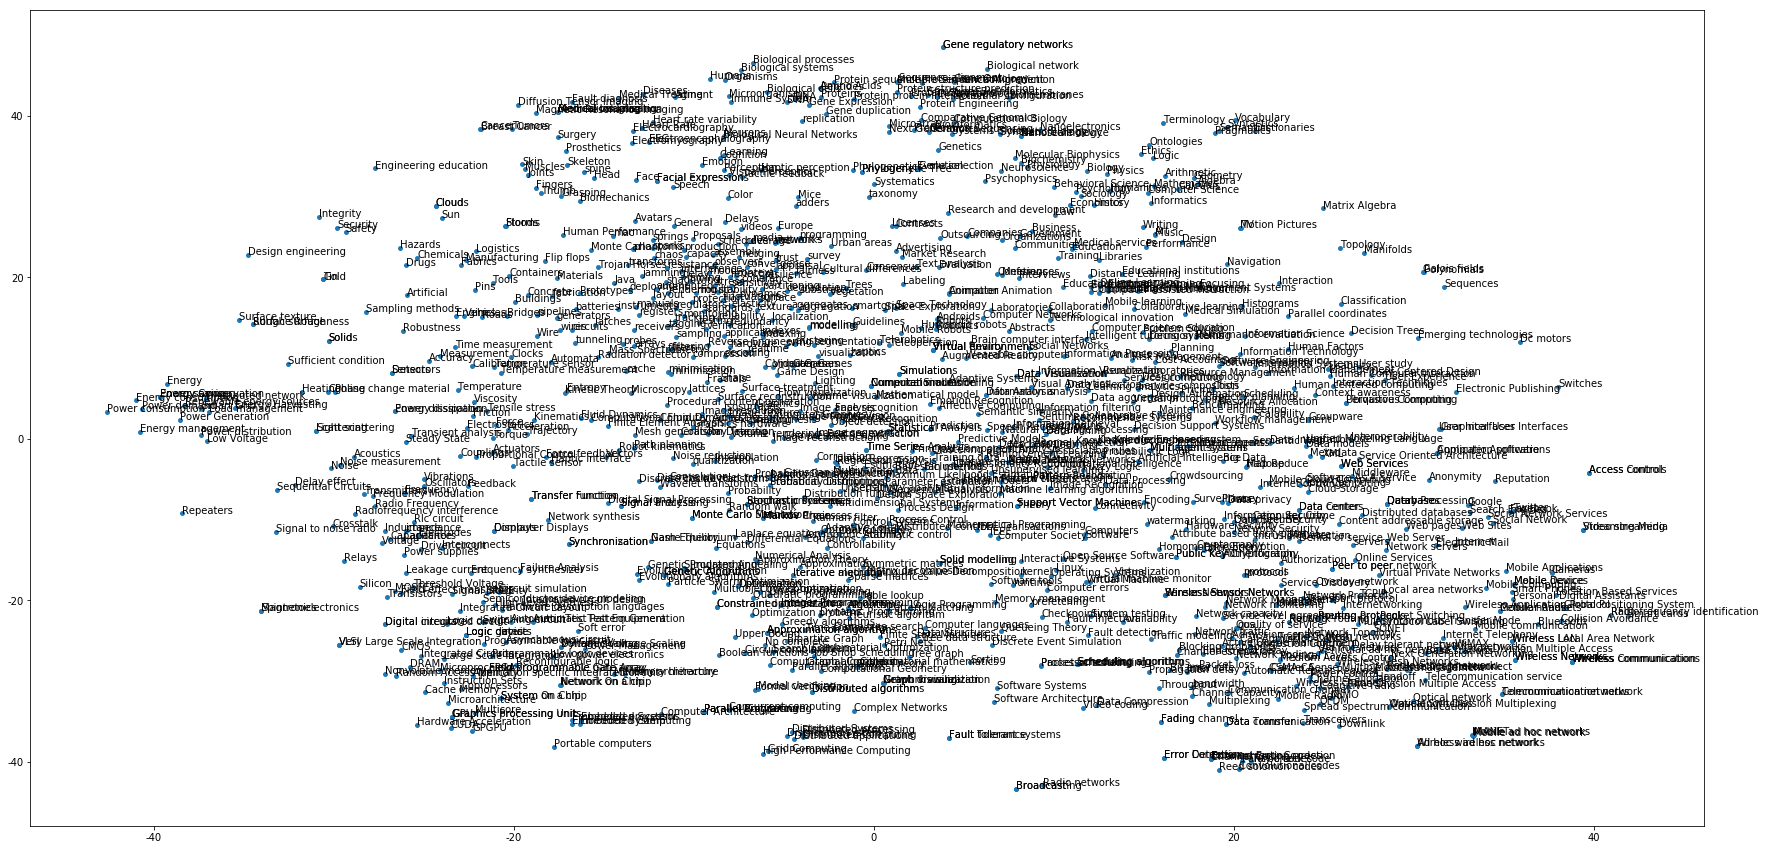

In [93]:
# 단어, 점 함께 출력

fig = plt.figure() # new figure 생성
fig.set_size_inches(30, 15) # 화면 크기
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], s = 15)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=10)
plt.show()

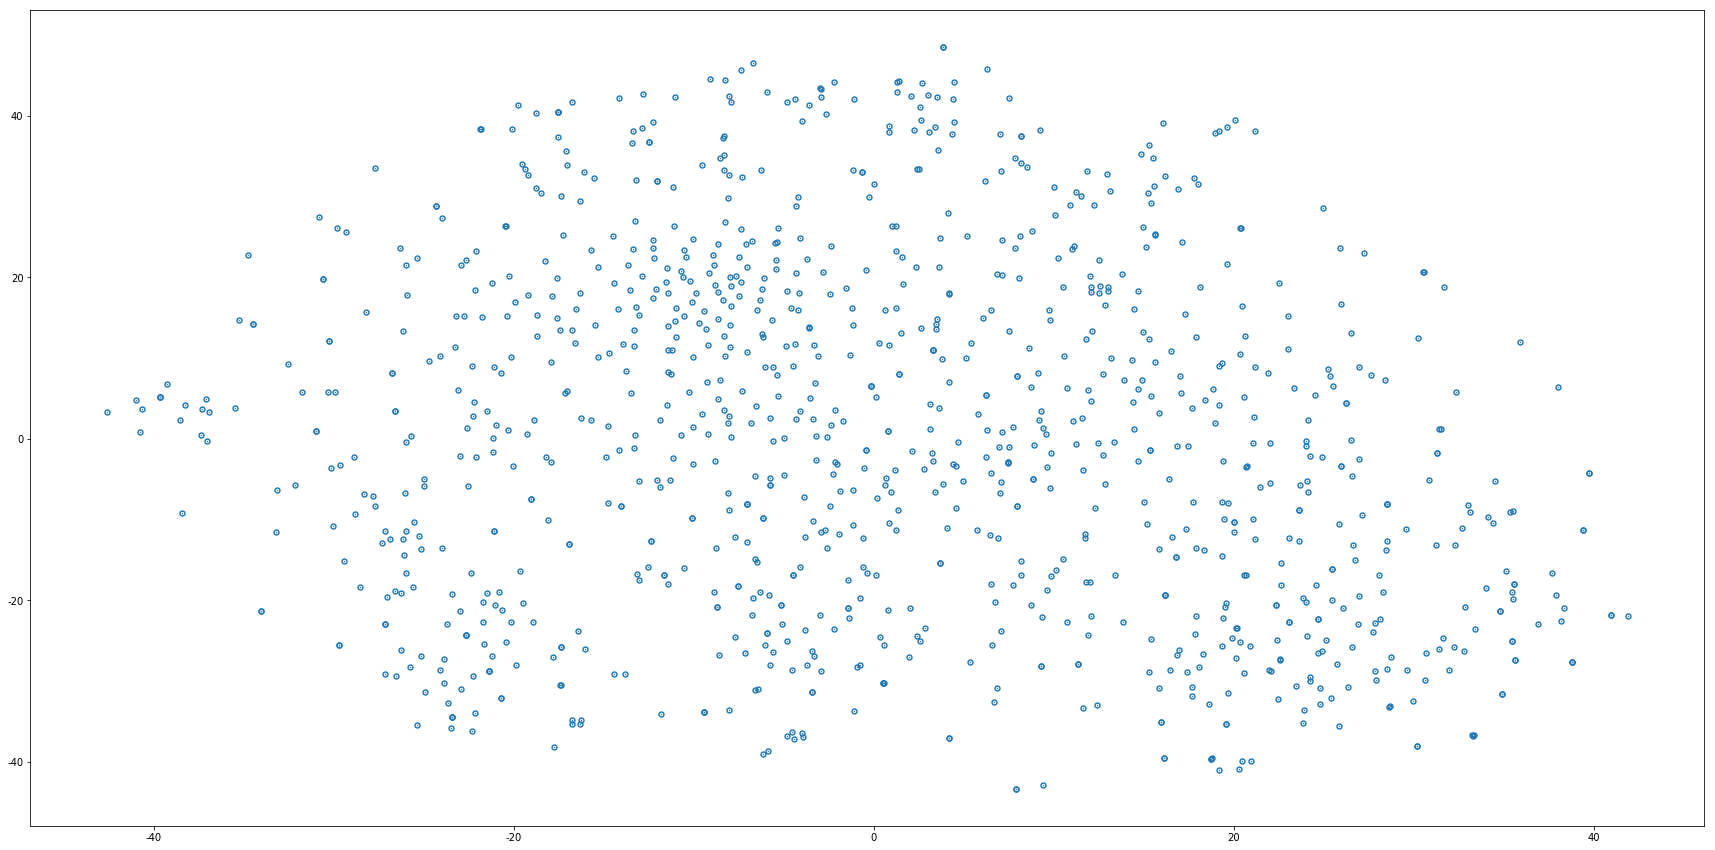

In [94]:
# 점만 출력

fig = plt.figure() # new figure 생성
fig.set_size_inches(30, 15) # 화면 크기

plt.scatter(df['x'], df['y'], s=2, linewidths = 5, zorder = 10)
plt.show()

In [95]:
X_tsne.shape

(1065, 2)

## 2) K means 시각화 해보기
(우리꺼 100차원을 k-means한 것을 t-sne를 통해 시각화 하는 것은 잘 일치하지 않고, 따로 t-sne하여 2차원으로 만든 값들을 가지고 k-means를 진행하여 시각화를 진행해봄.)

In [96]:
# 단어 벡터에서 k-means를 실행하고 일부 클러스터를 찍어본다.
start = time.time() # 시작시간

# 클러스터의 크기 "k"를 어휘 크기의 1/100로 설정한다.
num_clusters = int(len(ext_keys)/40)
# K means 를 정의하고 학습시킨다.
test_kmeans = KMeans( n_clusters = num_clusters )
idx = test_kmeans.fit_predict( X_tsne )
#kmeans.fit(X_tsne)

end = time.time() # 끝난시간
elapsed = end - start # 걸린 시간
print("Time taken fortransforming : ", elapsed, "seconds.")

Time taken fortransforming :  0.22201275825500488 seconds.


In [97]:
# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = ext_keys
test_word_centroid_map = {names[i]: idx[i] for i in range(len(names))}
#     word_centroid_map = dict(zip( model.wv.index2word, idx ))

# 첫번째 클러스터의 처음 10개를 출력
for cluster in range(0,10):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(test_word_centroid_map.values()))):
        if( list(test_word_centroid_map.values())[i] == cluster ):
            words.append(list(test_word_centroid_map.keys())[i])
    print(words)


Cluster 0
['Virtual machine monitor', 'Virtual Machine', 'Hardware security', 'Solid modeling', 'Operating Systems', 'Wireless Sensor Networks', 'Queueing Theory', 'Computers', 'IEEE Transactions', 'Attribute based encryption', 'Fault detection', 'prefetching', 'Cryptography', 'Fault injection', 'kernel', 'Discrete Event Simulation', 'Open Source Software', 'Checkpointing', 'Software tools', 'watermarking', 'Virtualization', 'Computer errors', 'Availability', 'Homomorphic Encryption', 'Sensor Networks', 'Encryption', 'Wireless Sensor Network', 'Solid modelling', 'runtime', 'Computer Society', 'Memory management', 'Public key', 'Software', 'Linux', 'Interactive Systems', 'IEEE', 'System testing', 'Public Key Cryptography', 'Authentication']

Cluster 1
['jamming', 'fabrication', 'manuals', 'batteries', 'probes', 'tunneling', 'Radiation detector', 'Flip flops', 'Concrete', 'wires', 'Temperature measurement', 'Java', 'Materials', 'arrays', 'Prototypes', 'Roads', 'Calibration', 'Buildings'

['Global Positioning System', 'Collision Avoidance', 'Wireless Network', 'Radiofrequency identification', 'Smart cards', 'Wireless communications', 'Code Division Multiple Access', 'Streaming Media', 'Video streaming', 'Cellular networks', 'Wireless Local Area Network', 'Cameras', 'Mobile communication', 'Wireless Networks', 'Mobile handsets', 'Cellular Radio', 'Smart Phones', 'Wireless Application Protocol', 'Personal Digital Assistants', 'Wireless Communication', 'Bluetooth', 'RFID', 'Location Based Services', 'Mobile devices', 'Mobile Computing', 'Wireless', 'Mobile Applications', 'Wireless LAN', 'WiMAX', 'Internet Telephony', 'Mobile Device']


In [98]:
centroids = test_kmeans.cluster_centers_
labels = test_kmeans.labels_
colors = ['b','g','r','c','m','y','k','w']

In [99]:
print(centroids[:10])
print(labels[:10])

[[ 1.1470929e+01 -1.6852581e+01]
 [-1.6651747e+01  1.5811242e+01]
 [ 1.4130024e+01  3.3091930e+01]
 [-2.5052036e+01 -1.6284369e+01]
 [ 1.7824457e+01  5.3069730e+00]
 [ 2.2569462e+01 -2.2819920e+01]
 [-3.9887011e-02  4.0886986e+01]
 [-6.0181174e+00 -1.8465616e+01]
 [ 7.8746586e+00 -2.4503191e+00]
 [ 3.6295067e+01 -2.1839113e+01]]
[ 9 15 10  6  3 10  4 21 17  5]


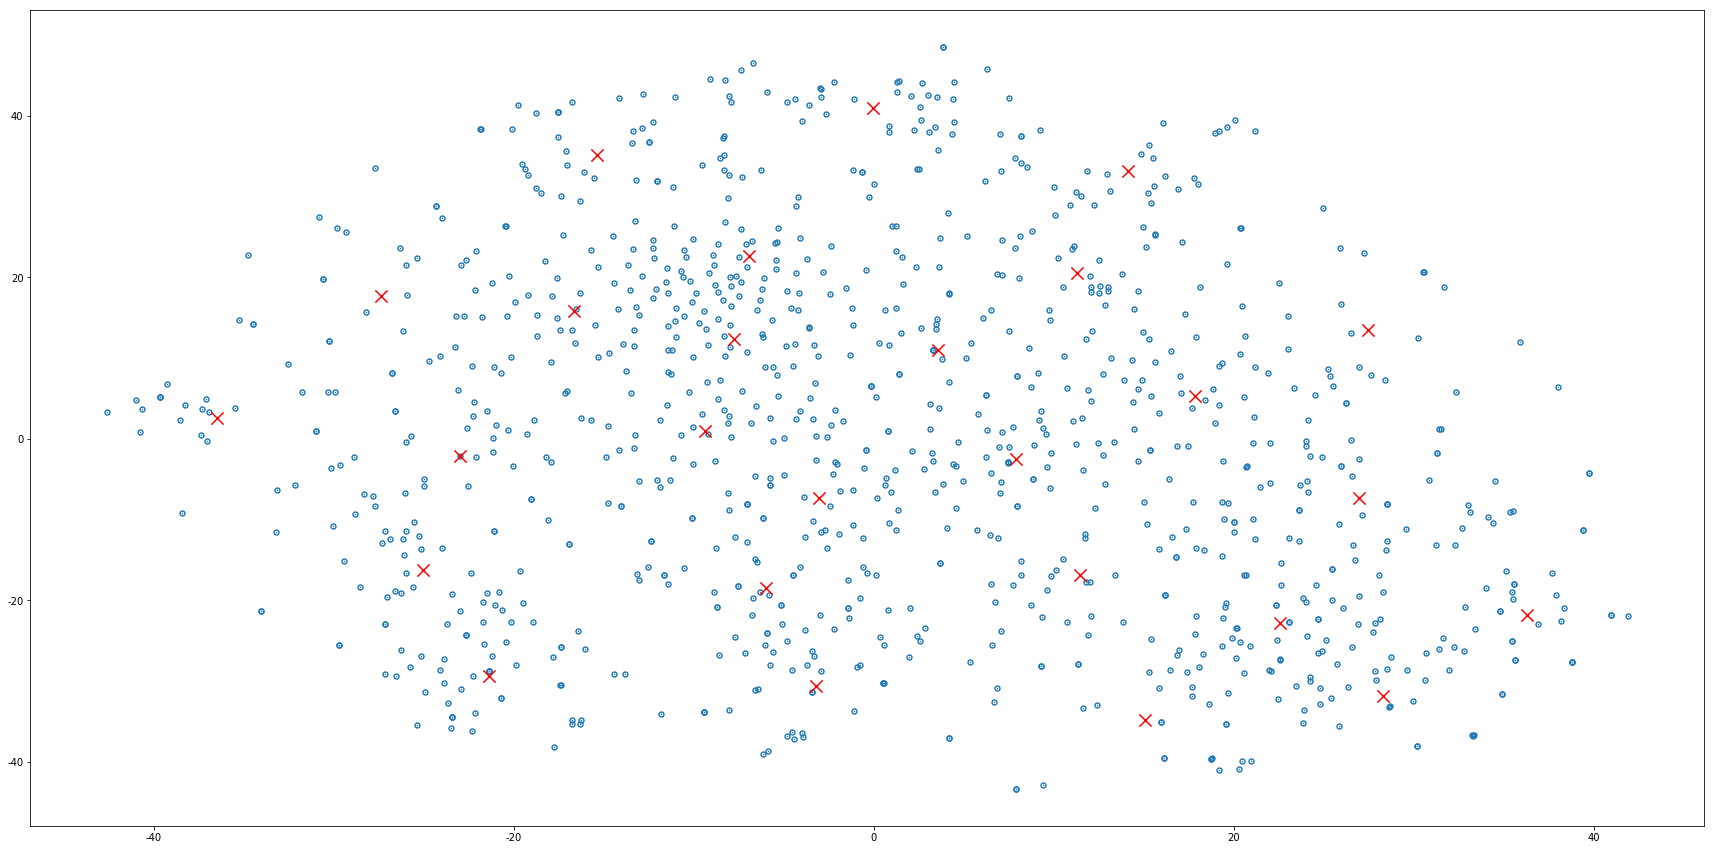

Time taken fortransforming :  0.3820216655731201 seconds.


In [100]:
start = time.time() # 시작시간

fig = plt.figure() # new figure 생성
fig.set_size_inches(30, 15) # 화면 크기

#for i in range(len(X)) :
#    plt.plot(df['x'][i], df['y'][i], colors[ (labels[i]%len(colors)) ], markersize = 10)

plt.scatter(df['x'], df['y'], s=2, linewidths = 5, zorder = 10)
plt.scatter(centroids[:, 0], centroids[:, 1], color="r", marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

end = time.time() # 끝난시간
elapsed = end - start # 걸린 시간
print("Time taken fortransforming : ", elapsed, "seconds.")

# Mean-Shift

In [102]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

In [103]:
# 단어 벡터에서 k-means를 실행하고 일부 클러스터를 찍어본다.
start = time.time() # 시작시간

# MeanShift 를 정의하고 학습시킨다.
ms = MeanShift()
ms.fit(word_vectors)
#idx = ms.fit_predict( word_vectors )
labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

colors = 1040*['burlywood','chartreuse','b','g','r','c','m','y','k','w']

end = time.time() # 끝난시간
elapsed = end - start # 걸린 시간
print("Time taken fortransforming : ", elapsed, "seconds.")

Time taken fortransforming :  5.088291168212891 seconds.


In [104]:
print("Number of estimated clusters:", n_clusters_)

Number of estimated clusters: 5


In [105]:
#클러스터별로 묶는거 해야함
cluster = {}
for i in range(n_clusters_) :
    cluster[i] = []
for i in range(len(word_vectors)) :
    cluster[labels[i]].append(ext_keys[i])

In [106]:
cluster[1]

['Trojan Horses']

In [107]:
# 첫번째 클러스터의 처음 10개를 출력
for i in range(len(cluster)) :
    # 클러스터 번호를 출력
    print("\nCluster {}".format(i))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    print(cluster[i])


Cluster 0


['Global Positioning System', 'Grid Computing', 'shadowing', 'Protein protein interaction', 'Field effect transistors', 'sparks', 'Risk Management', 'Human Factors', 'Shading', 'Service level agreements', 'Molecular configuration', 'Low power electronics', 'Wireless channels', 'Virtual machine monitor', 'Economics', 'Collision Avoidance', 'Information analysis', 'Transmitters', 'Acceleration', 'Cognition', 'Learning Management Systems', 'Vibrations', 'Sequential analysis', 'Synthetic Biology', 'Voltage scaling', 'CUDA', 'Pricing', 'Singular Value Decomposition', 'User study', 'Data Center', 'Machine Learning', 'Repeaters', 'stress', 'Intrusion Detection', 'Distributed Computing', 'Metadata', 'Pervasive Computing', 'Anonymity', 'programming', 'Brain computer interface', 'jamming', 'Wireless ad hoc networks', 'Fault tolerant systems', 'Capacity planning', 'Protein Structure', 'Mobile ad hoc network', 'Bioinformatics', 'biomembranes', 'Humanoid robots', 'Parallel architecture', 'Software 


Cluster 1
['Trojan Horses']

Cluster 2
['Containers']

Cluster 3
['Vectors']

Cluster 4
['Machine learning algorithms']


In [108]:
#우리 키워드, 클러스터 센터들 합친 np_array 만듦
ms_vectors = word_vectors
centers = np.array(cluster_centers)
ms_vectors = np.concatenate((ms_vectors, centers))
ms_vectors.shape

(1070, 100)

## MeanShift 한거 t-SNE를 통한 시각화

In [109]:
X = ms_vectors

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

start = time.time() # 시작시간

#X_tsne = tsne.fit_transform(X[:100,:]) # 100개의 단어에 대해서만 시각화를 원할 경우
ms_tsne = tsne.fit_transform(X)

end = time.time() # 끝난시간
elapsed = end - start # 걸린 시간
print("Time taken fortransforming : ", elapsed, "seconds.")

1070
[-1.7338486   0.03903867  0.73775357 -0.32044876  0.38342968 -0.9840778
  0.64681864  0.17976409 -0.25348413 -0.01251188]
Time taken fortransforming :  12.083691120147705 seconds.


In [110]:
ms_df = pd.DataFrame(ms_tsne[:10323], index=ext_keys, columns=['x', 'y'])
ms_df.shape

ValueError: Shape of passed values is (2, 1070), indices imply (2, 1065)

In [111]:
ms_df.head(10)

NameError: name 'ms_df' is not defined

In [112]:
start = time.time() # 시작시간

fig = plt.figure() # new figure 생성
fig.set_size_inches(30, 15) # 화면 크기

#for i in range(len(X)) :
#    plt.plot(df['x'][i], df['y'][i], colors[ (labels[i]%len(colors)) ], markersize = 10)

plt.scatter(ms_df['x'], ms_df['y'], s=2, linewidths = 5, zorder = 10)
ms_c = ms_df[10323:]
plt.scatter(ms_tsne[10323:, 0], ms_tsne[10323:, 1], color="r", marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

end = time.time() # 끝난시간
elapsed = end - start # 걸린 시간
print("Time taken fortransforming : ", elapsed, "seconds.")

NameError: name 'ms_df' is not defined

<Figure size 2160x1080 with 0 Axes>

## Mean-Shift 방법2

In [114]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

In [115]:
# 단어 벡터에서 k-means를 실행하고 일부 클러스터를 찍어본다.
start = time.time() # 시작시간

# MeanShift 를 정의하고 학습시킨다.
ms = MeanShift()
ms.fit(X_tsne)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

colors = 1040*['burlywood','chartreuse','b','g','r','c','m','y','k','w']

end = time.time() # 끝난시간
elapsed = end - start # 걸린 시간
print("Time taken fortransforming : ", elapsed, "seconds.")

Time taken fortransforming :  8.10546350479126 seconds.


In [116]:
print("Number of estimated clusters:", n_clusters_)

Number of estimated clusters: 1


In [117]:
'''
# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = ext_keys
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}
#     word_centroid_map = dict(zip( model.wv.index2word, idx ))

# 첫번째 클러스터의 처음 10개를 출력
for cluster in range(0,10):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)

'''

'\n# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.\nidx = list(idx)\nnames = ext_keys\nword_centroid_map = {names[i]: idx[i] for i in range(len(names))}\n#     word_centroid_map = dict(zip( model.wv.index2word, idx ))\n\n# 첫번째 클러스터의 처음 10개를 출력\nfor cluster in range(0,10):\n    # 클러스터 번호를 출력\n    print("\nCluster {}".format(cluster))\n    \n    # 클러스터번호와 클러스터에 있는 단어를 찍는다.\n    words = []\n    for i in range(0,len(list(word_centroid_map.values()))):\n        if( list(word_centroid_map.values())[i] == cluster ):\n            words.append(list(word_centroid_map.keys())[i])\n    print(words)\n\n'

In [118]:
ms_df = pd.DataFrame(X_tsne[:10323], index=ext_keys, columns=['x', 'y'])
ms_df.shape

(1065, 2)

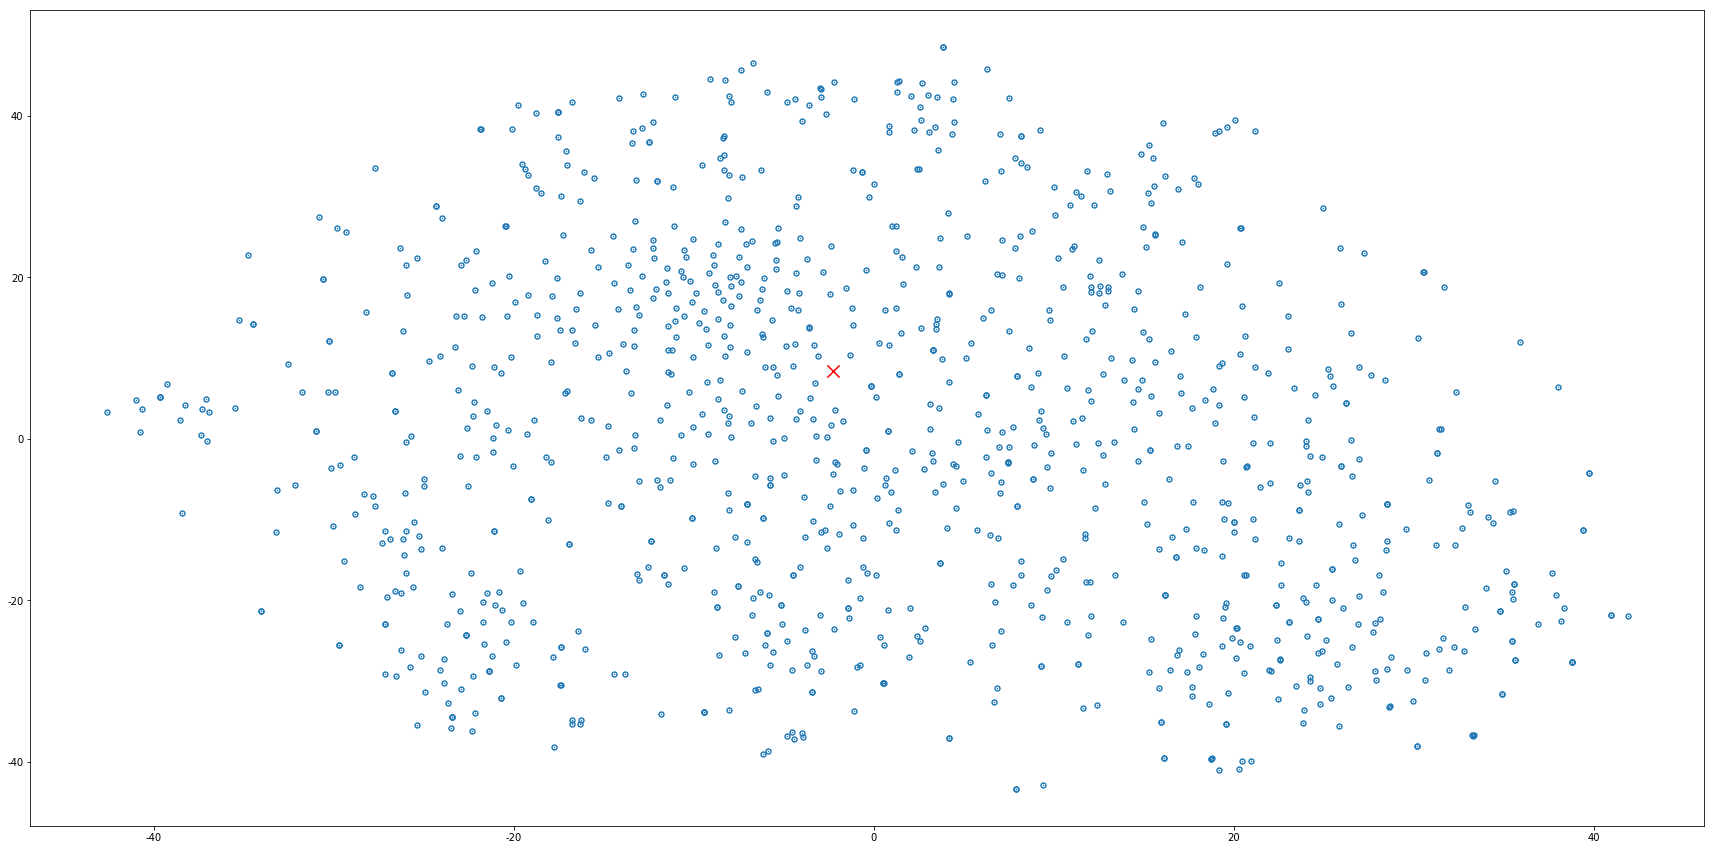

Time taken fortransforming :  0.3720216751098633 seconds.


In [119]:
start = time.time() # 시작시간

fig = plt.figure() # new figure 생성
fig.set_size_inches(30, 15) # 화면 크기

#for i in range(len(X)) :
#    plt.plot(df['x'][i], df['y'][i], colors[ (labels[i]%len(colors)) ], markersize = 10)

plt.scatter(ms_df['x'], ms_df['y'], s=2, linewidths = 5, zorder = 10)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color="r", marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

end = time.time() # 끝난시간
elapsed = end - start # 걸린 시간
print("Time taken fortransforming : ", elapsed, "seconds.")